In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pca import *
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure, curdoc
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, Button,  CDSView, IndexFilter
from bokeh.models.widgets import RadioGroup
from bokeh.models.widgets import Slider
output_notebook()

Loading BokehJS ...

In [48]:
# 非监督降维部分

# 数据标签分离
data_ori = pd.read_csv('mnistexcel.csv',header=None,dtype=np.float)
real_data = data_ori.iloc[:,:-1].copy()
labels = np.squeeze(data_ori.iloc[:,-1:].values)

# pca预降维
pca = PCA(n_components=400)
data_pca = pca.fit_transform(real_data)

# svd预降维
svd = TruncatedSVD(n_components=400)
data_svd = svd.fit_transform(real_data)

# t-SNE 降维
x_embedded = TSNE(n_components=2).fit_transform(data_svd)

In [65]:
np.max([np.max(x_embedded[:,0]),np.max(x_embedded[:,1])]).astype('int')

83

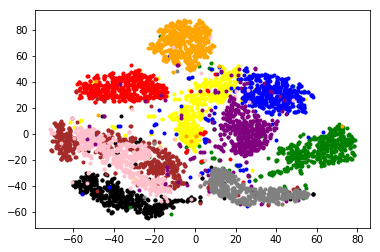

In [3]:
# 绘图
color=['yellow','black','green','red','blue','orange','brown','pink','purple','grey']
for i in range(10):
    plt.plot(x_embedded[i*500:(i+1)*500,0],x_embedded[i*500:(i+1)*500,1],'.',color=color[i])
plt.show()

In [4]:
# 下面是监督降维

# 读入三个测试数据集
test_data1 = pd.read_csv('data_less.csv',dtype=np.float)
test_data2 = pd.read_csv('data_liu.csv',dtype=np.float)
test_data3 = pd.read_csv('data_wang.csv',dtype=np.float)
test_data4 = pd.read_csv('res.csv',dtype=np.float)

# 选择一个数据集测试
data = test_data4

# 数据筛选
data = data[~data['new'].isin([0])]
print("这个数据集有标记的数量：",shape(data)[0])

# 数据与标签分离
real_data = data.iloc[:,:-2].copy()
true_labels = squeeze(data.iloc[:,-2:-1].values)
labels = squeeze(data.iloc[:,-1:].values)

这个数据集有标记的数量： 2290


In [5]:
# pca预降维
pca = PCA(n_components=400)
data_pca = pca.fit_transform(real_data)

# svd预降维
svd = TruncatedSVD(n_components=400)
data_svd = svd.fit_transform(real_data)

# LDA 监督降维
clf = LinearDiscriminantAnalysis(n_components=100)
res_LDA = clf.fit_transform(data_pca,labels)

# tSNE 降维
res = TSNE(n_components=2).fit_transform(res_LDA)

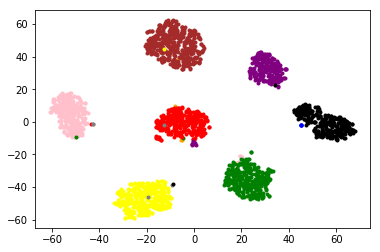

In [6]:
color = ['yellow','black','green','red','blue','orange','brown','pink','purple','grey']
colors = [color[i-1] for i in true_labels.astype(int)]
for i in range(shape(res)[0]):
    plt.plot(res[i,0],res[i,1],'.',color=colors[i])
plt.show()

In [7]:
color = ['#ABABAB','black','green','red','blue','#FF7F50','brown','pink','#7D26CD','grey']
colors = np.repeat('white',5000)
for i in range(10):
    t = i*500 + (500*np.random.rand(10)).astype(int)
    colors[t] = color[i]

In [10]:
selected = [64, 131, 255, 262, 346, 637, 678, 719, 726, 768, 836, 840, 858, 864, 932, 947, 957, 958, 961, 1051, 2047, 3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3011, 3012, 3013, 3015, 3016, 3017, 3018, 3020, 3022, 3023, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3043, 3044, 3045, 3047, 3050, 3051, 3052, 3053, 3054, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3066, 3067, 3068, 3069, 3070, 3072, 3073, 3075, 3079, 3080, 3081, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3092, 3094, 3097, 3098, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3111, 3112, 3114, 3117, 3119, 3120, 3121, 3122, 3123, 3124, 3126, 3127, 3128, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3148, 3149, 3152, 3154, 3155, 3156, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167, 3168, 3169, 3170, 3171, 3172, 3173, 3174, 3176, 3177, 3180, 3181, 3182, 3185, 3186, 3187, 3189, 3190, 3191, 3194, 3195, 3196, 3197, 3198, 3199, 3200, 3201, 3202, 3204, 3205, 3206, 3207, 3208, 3210, 3212, 3213, 3214, 3216, 3219, 3220, 3222, 3223, 3226, 3227, 3230, 3231, 3233, 3234, 3235, 3237, 3239, 3242, 3244, 3245, 3247, 3248, 3249, 3250, 3251, 3252, 3253, 3254, 3255, 3256, 3257, 3258, 3259, 3260, 3261, 3262, 3265, 3267, 3270, 3272, 3273, 3274, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3283, 3285, 3286, 3288, 3290, 3292, 3293, 3294, 3295, 3297, 3298, 3299, 3300, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3313, 3314, 3315, 3316, 3319, 3320, 3321, 3322, 3323, 3325, 3326, 3328, 3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3340, 3341, 3342, 3345, 3347, 3350, 3351, 3353, 3354, 3355, 3357, 3358, 3359, 3362, 3363, 3364, 3365, 3367, 3368, 3369, 3370, 3371, 3372, 3374, 3375, 3376, 3377, 3378, 3379, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3389, 3390, 3392, 3393, 3394, 3395, 3397, 3398, 3401, 3402, 3403, 3407, 3408, 3410, 3412, 3414, 3416, 3418, 3422, 3423, 3424, 3425, 3428, 3430, 3431, 3432, 3433, 3434, 3435, 3436, 3440, 3441, 3443, 3445, 3446, 3447, 3448, 3450, 3452, 3453, 3454, 3455, 3457, 3458, 3459, 3460, 3463, 3464, 3465, 3467, 3468, 3470, 3472, 3473, 3475, 3476, 3477, 3478, 3479, 3480, 3481, 3482, 3483, 3484, 3486, 3487, 3488, 3489, 3490, 3491, 3493, 3494, 3495, 3496, 3497, 3499, 3500, 3501, 3502, 3504, 3505, 3506, 3508, 3509, 3510, 3511, 3512, 3513, 3515, 3516, 3517, 3518, 3519, 3520, 3521, 3522, 3524, 3525, 3527, 3528, 3529, 3530, 3531, 3532, 3533, 3535, 3536, 3537, 3538, 3539, 3540, 3541, 3542, 3543, 3544, 3547, 3548, 3549, 3550, 3551, 3552, 3553, 3554, 3556, 3557, 3558, 3559, 3561, 3562, 3563, 3564, 3565, 3566, 3569, 3570, 3571, 3572, 3573, 3574, 3576, 3577, 3578, 3579, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3593, 3594, 3595, 3596, 3597, 3598, 3599, 3600, 3602, 3603, 3604, 3605, 3607, 3608, 3610, 3611, 3612, 3613, 3614, 3615, 3616, 3617, 3619, 3620, 3621, 3622, 3624, 3625, 3626, 3627, 3628, 3629, 3630, 3631, 3632, 3633, 3634, 3636, 3637, 3638, 3639, 3640, 3641, 3643, 3644, 3646, 3647, 3648, 3649, 3650, 3651, 3652, 3653, 3654, 3655, 3656, 3657, 3658, 3659, 3660, 3661, 3662, 3663, 3665, 3666, 3667, 3668, 3670, 3672, 3673, 3674, 3675, 3676, 3677, 3678, 3679, 3680, 3681, 3683, 3684, 3685, 3686, 3687, 3688, 3689, 3692, 3693, 3694, 3695, 3696, 3697, 3698, 3699, 3700, 3701, 3702, 3703, 3704, 3705, 3707, 3710, 3711, 3712, 3713, 3714, 3715, 3716, 3717, 3719, 3720, 3721, 3722, 3723, 3724, 3726, 3727, 3728, 3729, 3730, 3732, 3733, 3734, 3735, 3736, 3737, 3738, 3739, 3740, 3741, 3742, 3743, 3745, 3746, 3747, 3748, 3749, 3750, 3751, 3752, 3753, 3754, 3756, 3757, 3758, 3759, 3760, 3761, 3764, 3765, 3766, 3767, 3768, 3769, 3772, 3773, 3774, 3775, 3777, 3778, 3779, 3780, 3782, 3783, 3784, 3785, 3786, 3787, 3788, 3789, 3790, 3791, 3792, 3793, 3794, 3795, 3796, 3797, 3798, 3799, 3800, 3803, 3804, 3805, 3806, 3807, 3809, 3811, 3812, 3813, 3815, 3816, 3817, 3818, 3820, 3821, 3822, 3823, 3824, 3825, 3826, 3827, 3828, 3829, 3830, 3832, 3833, 3834, 3835, 3837, 3838, 3839, 3840, 3841, 3842, 3844, 3845, 3846, 3847, 3848, 3850, 3851, 3852, 3853, 3854, 3855, 3856, 3857, 3858, 3859, 3861, 3862, 3863, 3864, 3865, 3866, 3867, 3868, 3869, 3870, 3871, 3873, 3874, 3875, 3876, 3877, 3878, 3879, 3880, 3881, 3882, 3884, 3885, 3886, 3887, 3889, 3890, 3891, 3892, 3893, 3894, 3895, 3896, 3897, 3898, 3899, 3900, 3901, 3902, 3903, 3904, 3905, 3906, 3907, 3908, 3909, 3910, 3911, 3912, 3913, 3914, 3915, 3916, 3917, 3919, 3920, 3921, 3922, 3923, 3924, 3925, 3926, 3927, 3928, 3929, 3930, 3931, 3932, 3933, 3934, 3935, 3936, 3937, 3938, 3940, 3942, 3943, 3945, 3946, 3947, 3948, 3949, 3950, 3951, 3952, 3953, 3954, 3955, 3956, 3957, 3959, 3960, 3961, 3962, 3963, 3964, 3965, 3966, 3967, 3968, 3969, 3970, 3971, 3972, 3973, 3974, 3975, 3977, 3978, 3979, 3980, 3981, 3982, 3983, 3984, 3985, 3987, 3990, 3991, 3992, 3993, 3994, 3995, 3996, 3997, 3998, 3999, 4038, 4067, 4100, 4241, 4260, 4300, 4436]

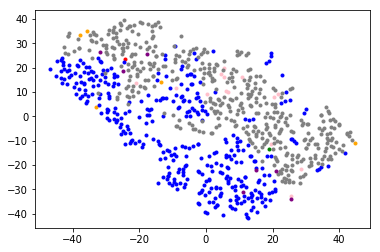

In [67]:
data_pick = data_ori.iloc[selected,:]
labels_1 = squeeze(data_pick.iloc[:,-1:].values)

# pca预降维
pca = PCA(n_components=400)
data_pca = pca.fit_transform(data_pick)

# svd预降维
svd = TruncatedSVD(n_components=400)
data_svd = svd.fit_transform(data_pick)

# LDA 监督降维
# clf = LinearDiscriminantAnalysis(n_components=100)
# res_LDA = clf.fit_transform(data_pca,labels_1)

# tsne
res = TSNE(n_components=2).fit_transform(data_pca)

# 画图
color = ['yellow','black','green','red','blue','orange','brown','pink','purple','grey']
colors = [color[i-1] for i in labels_1.astype(int)]
for i in range(shape(res)[0]):
    plt.plot(res[i,0],res[i,1],'.',color=colors[i])
plt.show()